#Introduction
The objective of the current text is to analyse crime patterns in San Francisco.

In [1]:
base_url <- "https://raw.githubusercontent.com/uwescience/datasci_course_materials/master/assignment6/"
crimeSF_url <- paste(base_url, "sanfrancisco_incidents_summer_2014.csv",sep="")
download.file(crimeSF_url, "crimeSF_url.csv", method = "curl")
crimeSF <- read.csv("crimeSF_url.csv")


In [2]:
#names(crimeSF)
#levels(crimeSF$PdDistrict)
#head(crimeSF)
#levels(crimeSF$Resolution)

In [3]:
#class(crimeSF$Date)
crimeSF$Date <- as.character(crimeSF$Date)
crimeSF$Date <- as.Date(crimeSF$Date, "%m/%d/%Y")
#head(crimeSF)
#head(crimeSF$DayOfWeek,20)

#head(crimeSF$DayOfWeek,20)
#head(crimeSF)

In [4]:
#class(crimeSF$Date)

In [5]:
library(ggplot2)
library(plyr)
library(stringr)
library(reshape2)
#summary(crimeSF)
#levels(crimeSF$Category)
crimeSFrel <- crimeSF[, c("Category", "Date", "DayOfWeek","Time","PdDistrict")]
#crimeSFrel <-  ddply(crimeSFrel, .(Category,DayOfWeek, Time), transform, Hour = str_split(Time, ":") )
x <-  with(crimeSFrel,str_split_fixed(Time, ":",2) )
#class(x)
#head(x)
crimeSFrel$Hour <- as.factor(x[, 1])
#head(crimeSFrel)
#need to group time to obtain larger groups
CatHour <- ddply(crimeSFrel, .(Category,DayOfWeek, Hour,PdDistrict), nrow)
#head(CatHour)
#summary(CatHour)
#summary(CatHour$Category)
#summary(CatHour$PdDistrict)
#nrow(CatHour)


In [6]:
#head(crimeSFrel)
#Assault = crimeSFrel[crimeSFrel$Category == "ASSAULT",]
CrimesConsidered = c("ASSAULT","FRAUD","VEHICLE THEFT","LARCENY/THEFT","ROBBERY")
Crimes = crimeSFrel[crimeSFrel$Category %in% CrimesConsidered,]
#AssaultTime <- ddply(Assault, .(DayOfWeek, Hour), nrow)
#head(CatHour)
#summary(CatHour)
#summary(AssaultTime)
#names(AssaultTime) <- gsub("V1", "Assaults", names(AssaultTime))
#AssaultTimePlot <- ggplot(AssaultTime, aes(Hour,Assaults, group= DayOfWeek )) + geom_line(aes(colour=DayOfWeek ))
#AssaultTimePlot

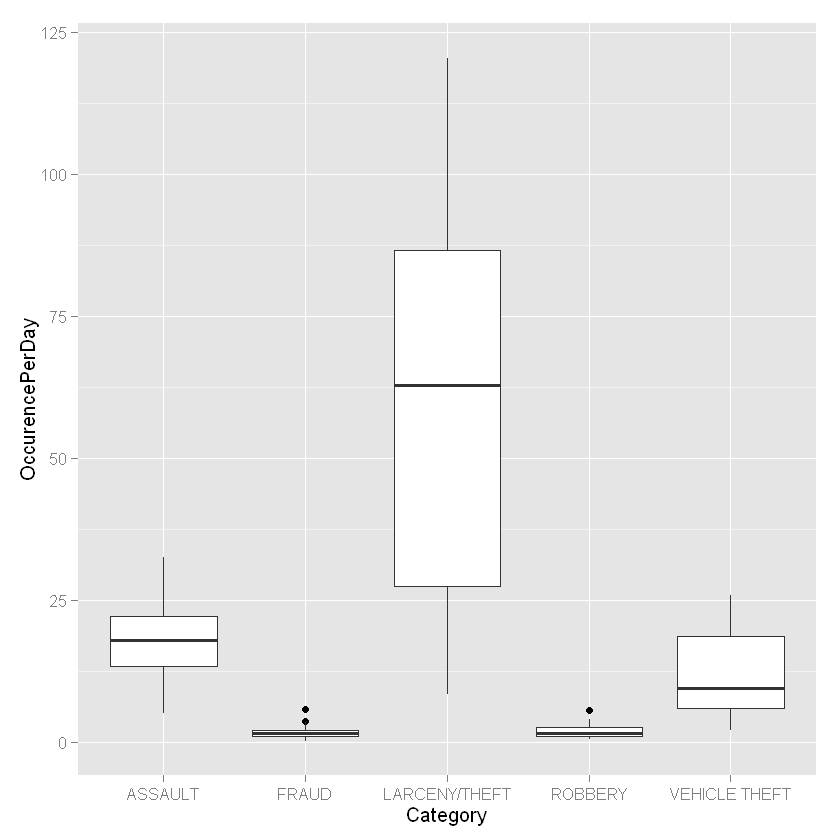

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


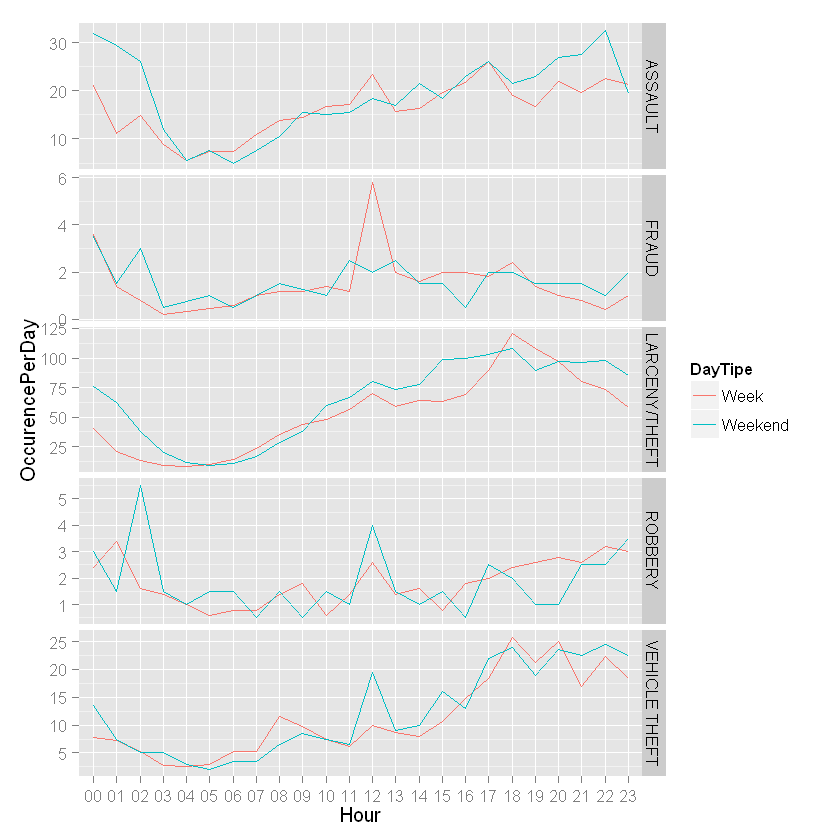

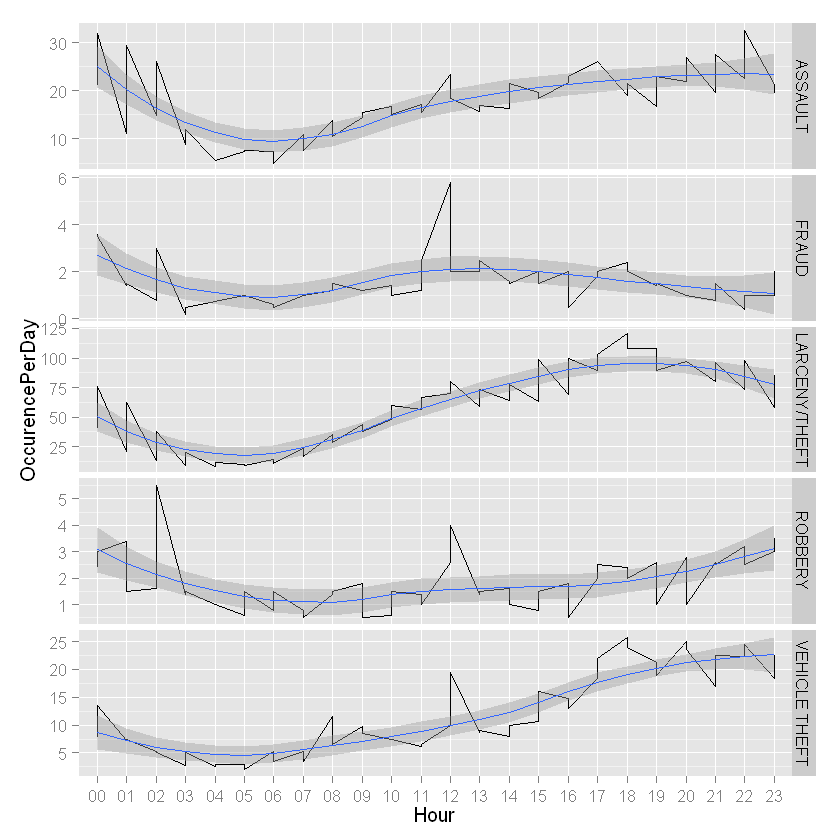

In [64]:
#head(CatHour)
Crimes$DayTipe <- with(Crimes, ifelse(DayOfWeek == "Saturday" | DayOfWeek == "Sunday", "Weekend", "Week"))
CrimeTime <- ddply(Crimes, .(Category,DayTipe, Hour), nrow)
#head(CatHour)
#summary(CatHour)
#summary(CrimeTime)
names(CrimeTime) <- gsub("V1", "Occurences", names(CrimeTime))
CrimeTime$OccurencePerDay <- with(CrimeTime, ifelse(DayTipe == "Weekend",Occurences/2,Occurences/5))
ggplot(CrimeTime, aes(Category ,OccurencePerDay)) + geom_boxplot()
CrimeTimePlot <- ggplot(CrimeTime, aes(Hour,OccurencePerDay, group= DayTipe )) + geom_line(aes(colour=DayTipe ))
CrimeTimePlot + facet_grid(Category ~ ., scale = "free_y")
#CrimeTimePlot + facet_grid(Category ~ ., scale = "free_y") + geom_smooth(aes(colour=DayTipe, linetype = DayTipe))
ggplot(CrimeTime, aes(Hour,OccurencePerDay, group= 1)) + geom_line() + facet_grid(Category ~ ., scale = "free_y") + geom_smooth()
#CrimeTimePlot + facet_grid(Category ~ .)

In [43]:
Fraud <- CrimeTime[CrimeTime$Category  == "FRAUD",]
#Fraud
FourAM <- CrimeTime[CrimeTime$Hour  == "04",]

In [44]:
#names(CrimeTime)
CrimeTimeCast <- dcast(CrimeTime, DayTipe + Hour ~ Category )
#CrimeTimeCast
CrimeTimeCastCor <- CrimeTimeCast[ , CrimesConsidered]
#CrimeTimeCastCor
cor(CrimeTimeCastCor, use = "na.or.complete")

[1] "Category"        "DayTipe"         "Hour"            "Occurences"     
[5] "OccurencePerDay"

Using OccurencePerDay as value column: use value.var to override.


,ASSAULT,FRAUD,VEHICLE THEFT,LARCENY/THEFT,ROBBERY
ASSAULT,1.0000000,0.4096046,0.6155014,0.7121945,0.4175055
FRAUD,0.40960458,1.00000000,0.07077001,0.25808651,0.33577387
VEHICLE THEFT,0.61550138,0.07077001,1.00000000,0.85895442,0.41450577
LARCENY/THEFT,0.7121945,0.2580865,0.8589544,1.0000000,0.2309677
ROBBERY,0.4175055,0.3357739,0.4145058,0.2309677,1.0000000


In [26]:
TimeSum <- ddply(Crimes, .(Date,DayOfWeek), nrow)
#summary(TimeSum)
DaysOfWeekCt <- as.data.frame(summary(TimeSum$DayOfWeek))
#dim(DaysOfWeekCt)
DaysOfWeekCt$DayOfWeek <- row.names(DaysOfWeekCt)
names(DaysOfWeekCt) <- c("DaysCount","DayOfWeek")
#DaysOfWeekCt
#TimeSumCast <- dcast(TimeSum, DayTipe + Hour ~ DayOfWeek        )


      Date                DayOfWeek        V1       
 Min.   :2014-06-01   Friday   :13   Min.   :122.0  
 1st Qu.:2014-06-23   Monday   :13   1st Qu.:143.5  
 Median :2014-07-16   Saturday :13   Median :158.0  
 Mean   :2014-07-16   Sunday   :14   Mean   :161.6  
 3rd Qu.:2014-08-08   Thursday :13   3rd Qu.:177.2  
 Max.   :2014-08-31   Tuesday  :13   Max.   :249.0  
                      Wednesday:13                  

[1] 7 1

,DaysCount,DayOfWeek
Friday,13,Friday
Monday,13,Monday
Saturday,13,Saturday
Sunday,14,Sunday
Thursday,13,Thursday
Tuesday,13,Tuesday
Wednesday,13,Wednesday


          Category     DayOfWeek       V1        
 ASSAULT      :7   Friday   :5   Min.   :  27.0  
 FRAUD        :7   Monday   :5   1st Qu.:  41.5  
 LARCENY/THEFT:7   Saturday :5   Median : 288.0  
 ROBBERY      :7   Sunday   :5   Mean   : 424.7  
 VEHICLE THEFT:7   Thursday :5   3rd Qu.: 446.0  
 ARSON        :0   Tuesday  :5   Max.   :1583.0  
 (Other)      :0   Wednesday:5                   

Joining by: DayOfWeek


,Category,DayOfWeek,Occurences,DaysCount
1,ASSAULT,Friday,33.84615,13
2,ASSAULT,Monday,31.23077,13
3,ASSAULT,Saturday,34.76923,13
4,ASSAULT,Sunday,33,14
5,ASSAULT,Thursday,29.76923,13
6,ASSAULT,Tuesday,27.38462,13


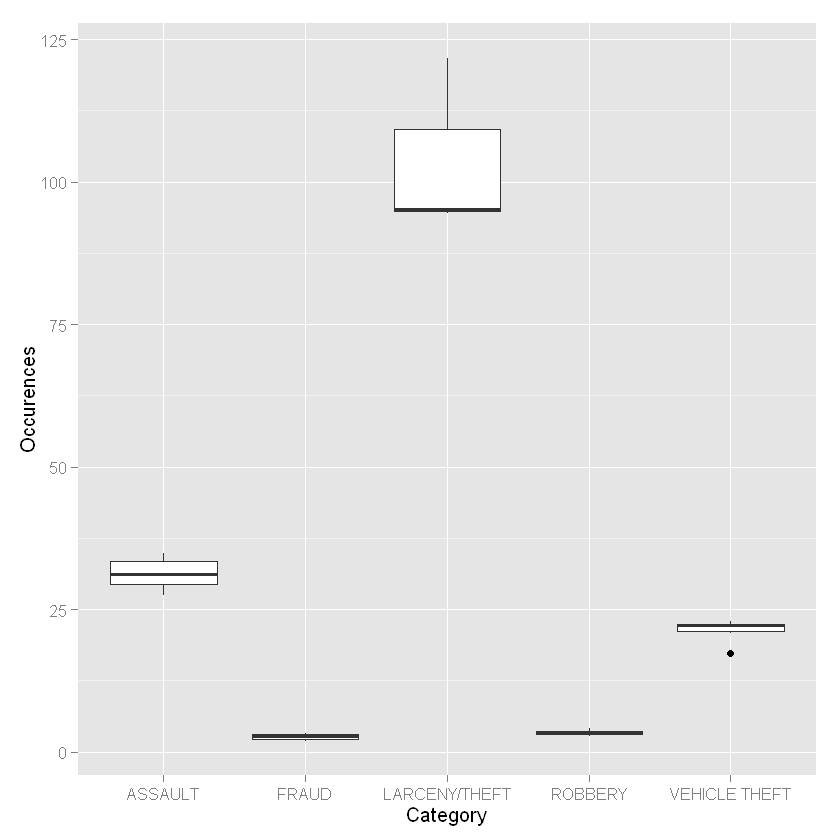

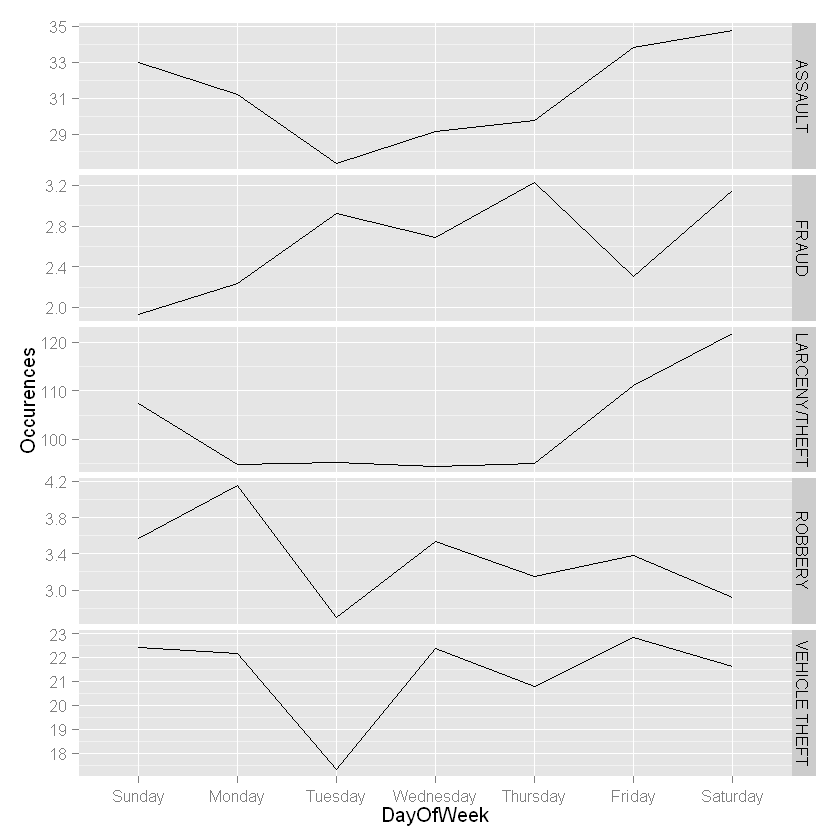

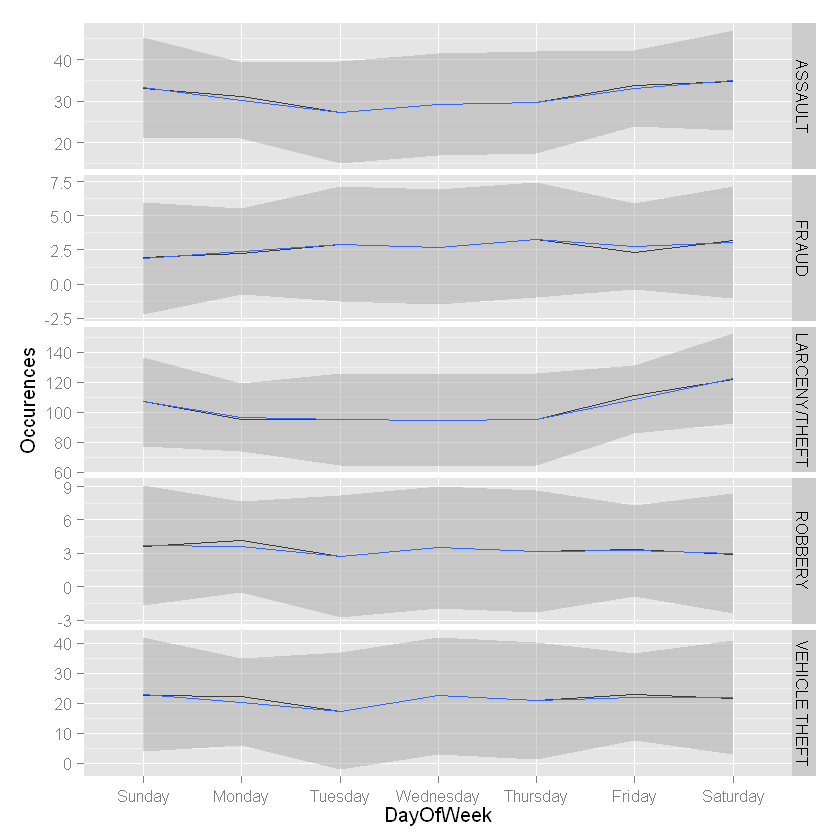

In [32]:
#Crimes$DayTipe <- with(Crimes, ifelse(DayOfWeek == "Saturday" | DayOfWeek == "Sunday", "Weekend", "Week"))

CrimeDayOfWeek <- ddply(Crimes, .(Category,DayOfWeek), nrow)
#head(CatHour)
#summary(CatHour)
summary(CrimeDayOfWeek)
names(CrimeDayOfWeek) <- gsub("V1", "Occurences", names(CrimeDayOfWeek))
CrimeDayOfWeek <- join(CrimeDayOfWeek, DaysOfWeekCt)
CrimeDayOfWeek$Occurences <- with(CrimeDayOfWeek, Occurences/DaysCount)
head(CrimeDayOfWeek)
CrimeDayOfWeek$DayOfWeek <- factor(CrimeDayOfWeek$DayOfWeek, levels= c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
CrimeDayOfWeek <- CrimeDayOfWeek[order(CrimeDayOfWeek$DayOfWeek), ]
#CrimeTime$OccurencePerDay <- with(CrimeTime, ifelse(DayTipe == "Weekend",Occurences/2,Occurences/5))
ggplot(CrimeDayOfWeek, aes(Category ,Occurences)) + geom_boxplot()
CrimeDayOfWeekPlot <- ggplot(CrimeDayOfWeek, aes(DayOfWeek,Occurences, group= 1 )) + geom_line() 
CrimeDayOfWeekPlot + facet_grid(Category ~ ., scale = "free_y")
CrimeDayOfWeekPlot + facet_grid(Category ~ ., scale = "free_y") + geom_smooth(method = "loess")

#CrimeDayOfWeekPlot + facet_grid(Category ~ .)
#CrimeTimePlot + facet_grid(Category ~ .)

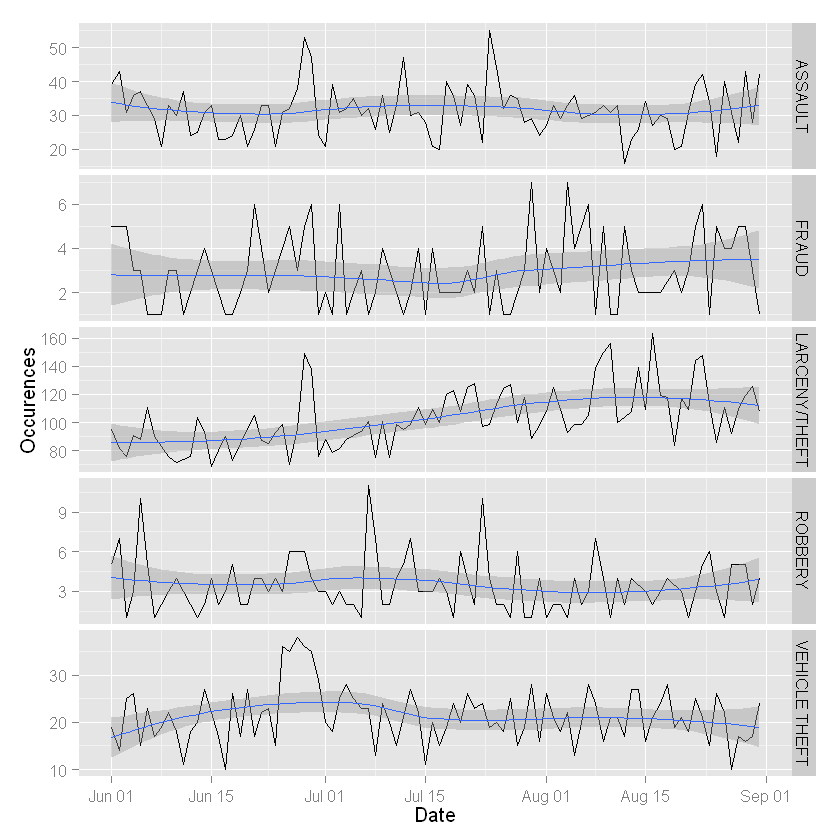

In [34]:
#Crimes$DayTipe <- with(Crimes, ifelse(DayOfWeek == "Saturday" | DayOfWeek == "Sunday", "Weekend", "Week"))
CrimeDay <- ddply(Crimes, .(Category,Date), nrow)
#head(CatHour)
#summary(CatHour)
#summary(CrimeDayOfWeek)
names(CrimeDay) <- gsub("V1", "Occurences", names(CrimeDay))
#CrimeDayOfWeek$DayOfWeek <- factor(CrimeDayOfWeek$DayOfWeek, levels= c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
#CrimeDayOfWeek <- CrimeDayOfWeek[order(CrimeDayOfWeek$DayOfWeek), ]
#CrimeTime$OccurencePerDay <- with(CrimeTime, ifelse(DayTipe == "Weekend",Occurences/2,Occurences/5))

CrimeDayPlot <- ggplot(CrimeDay, aes(Date,Occurences, group= 1 )) + geom_line()
CrimeDayPlot + facet_grid(Category ~ ., scale = "free_y") + geom_smooth(method = "loess")
#CrimeDayPlot + facet_grid(Category ~ .)
#CrimeTimePlot + facet_grid(Category ~ .)

In [58]:
CrimeDayCast <- dcast(CrimeDay, Date  ~ Category)
#CrimeDayCast
CrimeDayCastCor <- as.matrix(CrimeDayCast[ , CrimesConsidered])
#CrimeDayCastCor
cor(CrimeDayCastCor, use = "na.or.complete")
#library(corrplot)
#corrplot(CrimeDayCastCor)
#corrplot(CrimeDayCastCor, type="upper", order="original", tl.col="black")
#symnum(CrimeDayCastCor, na = "NA")


Using Occurences as value column: use value.var to override.


,ASSAULT,FRAUD,VEHICLE THEFT,LARCENY/THEFT,ROBBERY
ASSAULT,1.00000000,0.05097364,0.20172220,0.30633390,0.11761531
FRAUD,0.05097364,1.00000000,0.27918756,0.09355024,-0.03628959
VEHICLE THEFT,0.20172220,0.27918756,1.00000000,0.10890705,0.01020172
LARCENY/THEFT,0.30633390,0.09355024,0.10890705,1.00000000,-0.04533799
ROBBERY,0.11761531,-0.03628959,0.01020172,-0.04533799,1.00000000


,Hour,PdDistrict,Occurences
1,00,BAYVIEW,63
2,00,CENTRAL,75
3,00,INGLESIDE,70
4,00,MISSION,78
5,00,NORTHERN,99
6,00,PARK,19
7,00,RICHMOND,33
8,00,SOUTHERN,111
9,00,TARAVAL,51
10,00,TENDERLOIN,33


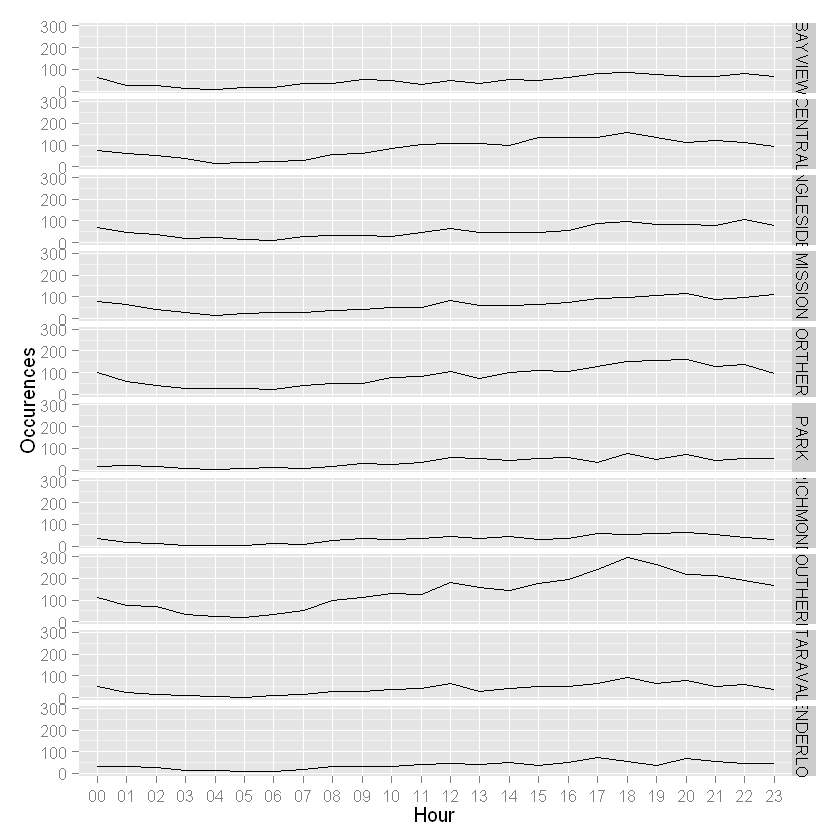

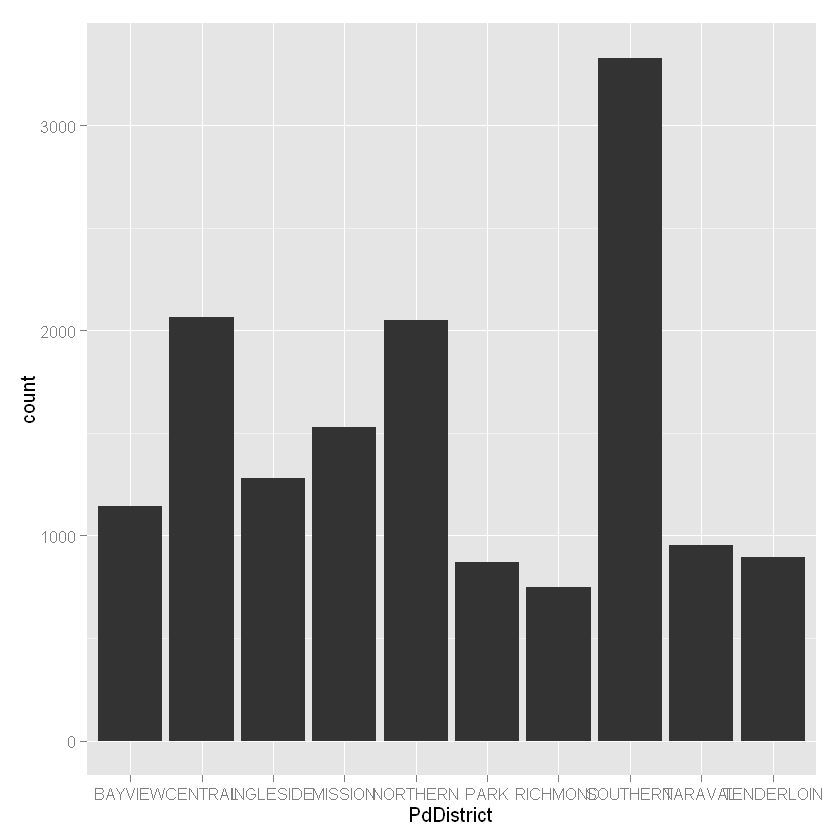

In [52]:
#Crimes$DayTipe <- with(Crimes, ifelse(DayOfWeek == "Saturday" | DayOfWeek == "Sunday", "Weekend", "Week"))
CrimePlace = crimeSFrel[crimeSFrel$Category == "ASSAULT",]
CrimePlace <- ddply(Crimes, .(Hour, PdDistrict), nrow)
#head(CatHour)
#summary(CatHour)
#summary(CrimePlace)
names(CrimePlace) <- gsub("V1", "Occurences", names(CrimePlace))
head(CrimePlace,10)
CrimePlacePlot <- ggplot(CrimePlace, aes(Hour ,Occurences, group = 1)) + geom_line() + facet_grid(PdDistrict ~ .,  space= "free_y" )
CrimePlacePlot
#CrimeTimePlot + facet_grid(Category ~ ., scale = "free_y")
#CrimePlacePlot + facet_grid(PdDistrict ~ ., scale = "free_y")
CrimePlace2 <- ddply(Crimes, .( PdDistrict), nrow)
names(CrimePlace2) <- gsub("V1", "Occurences", names(CrimePlace2))
ggplot(Crimes, aes(PdDistrict)) + geom_bar()